In [47]:
%pip install blpapi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
%pip install xbbg

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import blpapi
from xbbg import blp
import pandas as pd
import datetime

In [66]:
tickers = [
 'AEM', 'AQN', 'ATD', 'BMO', 'BNS', 'ABX', 'BCE', 'BAM', 'BN', 'BIP-U',
 'CAE', 'CCO', 'CAR-U', 'CM', 'CNR', 'CNQ', 'CP', 'CTC/A', 'CCL/B', 'CVE',
 'GIB/A', 'CSU', 'DOL', 'EMA', 'ENB', 'FM', 'FSV', 'FTS', 'FNV', 'WN',
 'GIL', 'H', 'IMO', 'IFC', 'K', 'L', 'MG', 'MFC', 'MRU', 'NA',
 'NTR', 'OTEX', 'PPL', 'POW', 'QSR', 'RCI/B', 'RY', 'SAP', 'SHOP', 'SLF',
 'SU', 'TRP', 'TECK/B', 'T', 'TRI', 'TD', 'TOU', 'WCN', 'WPM', 'WSP'
]

a)	Web scrape list of stock tickers for all stocks comprising S&P/TSX60 index from the Globe and Mail website: https://www.theglobeandmail.com/investing/markets/indices/TXSX/components/

Note: if you can’t web scrape the tickers from the above website, you can do it using any other website (using Wikipedia is trivial so try using something else).


           AEM CN Equity AQN CN Equity ATD CN Equity BMO CN Equity  \
                 PX_LAST       PX_LAST       PX_LAST       PX_LAST   
2020-05-19         94.76         19.17         41.55         65.22   
2020-05-20         92.69         18.66         41.72         66.45   
2020-05-21         90.65         18.49         41.72         65.10   
2020-05-22         91.79         18.75         42.54         64.14   
2020-05-25         91.24         18.83         42.88         65.25   
...                  ...           ...           ...           ...   
2025-05-12        148.65          8.00         69.51        141.89   
2025-05-13        149.05          7.81         69.01        141.98   
2025-05-14        146.37          7.59         68.35        143.17   
2025-05-15        148.70          7.66         69.60        143.65   
2025-05-16        148.81          7.81         69.04        143.75   

           BNS CN Equity ABX CN Equity BCE CN Equity BAM CN Equity  \
                 PX

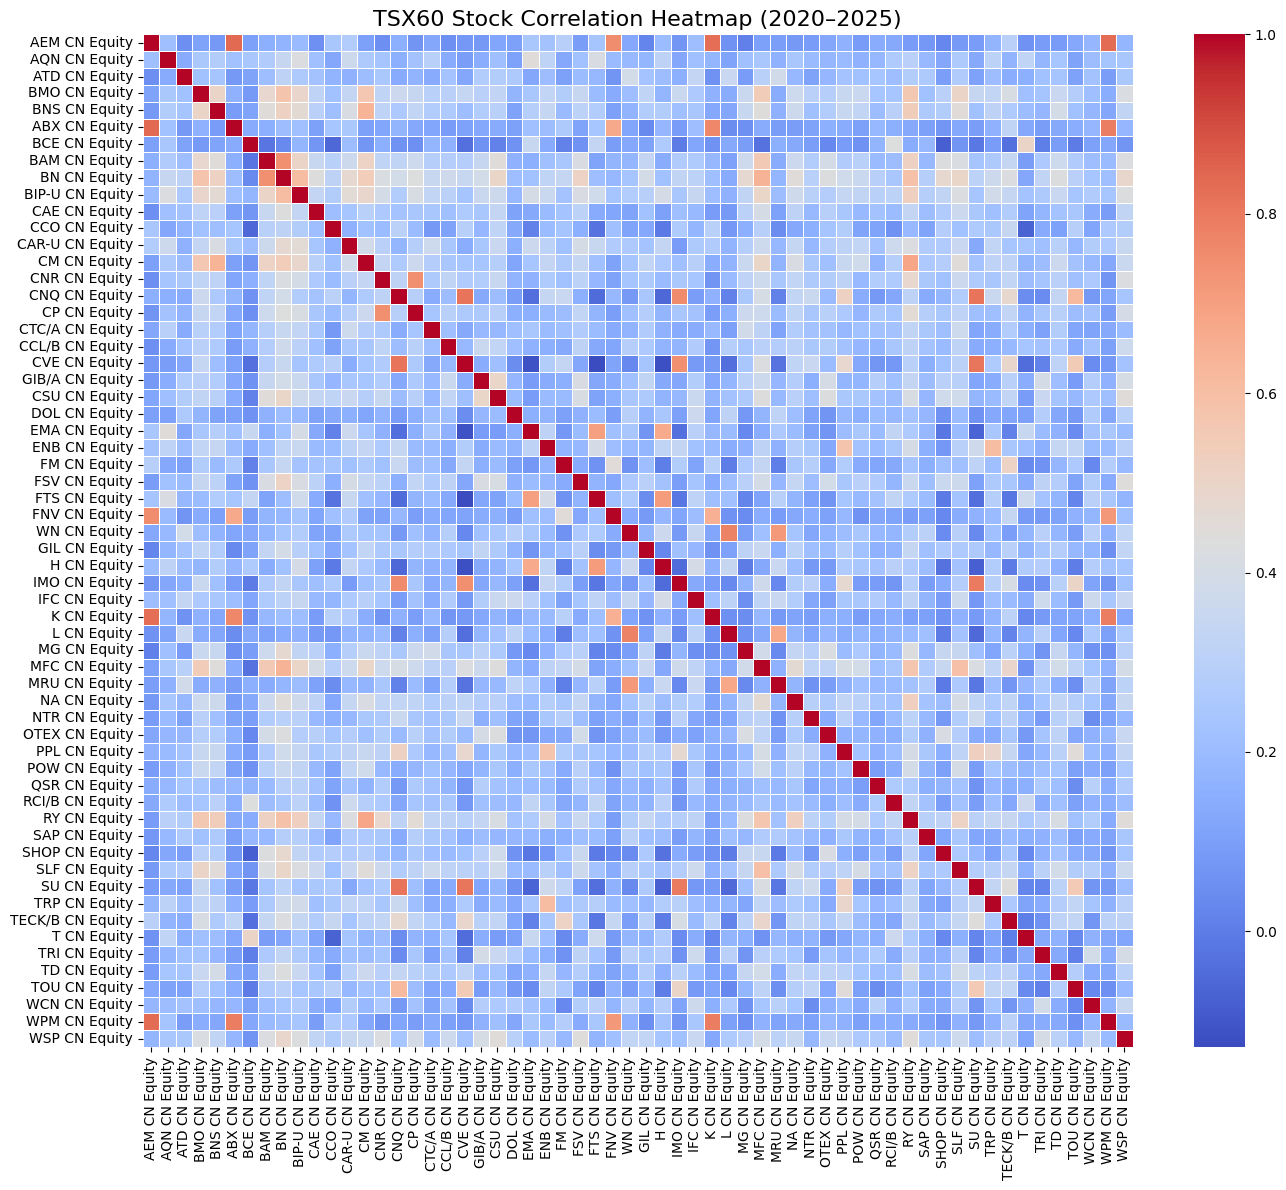

In [82]:
from xbbg import blp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


tsx60_df = pd.DataFrame()
tsx60_df["Company"] = tickers

tsx60_df["Company"] = tsx60_df["Company"] + ' CN Equity'

# Date range
start_date = '2020-05-16'
end_date = '2025-05-16'

# Download daily closing prices (PX_LAST is correct field)
price_data = blp.bdh(
    tsx60_df["Company"].tolist(),
    flds='PX_LAST',
    start_date=start_date,
    end_date=end_date,
    Per='D'
)
print(price_data)

# Restructure the multi-index DataFrame: (date, ticker) → wide format
price_data.columns = price_data.columns.droplevel(1)

# Drop tickers with all missing values
price_data = price_data.dropna(axis=1, how='all')

# Compute log returns
returns = np.log(price_data / price_data.shift(1)).dropna()

# Variance-covariance matrix
cov_matrix = returns.cov()

# Correlation matrix
corr_matrix = returns.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("TSX60 Stock Correlation Heatmap (2020–2025)", fontsize=16)
plt.tight_layout()
plt.show()

b)	For the list of tickers identified in Part A, download their daily closing prices from Bloomberg using the Bloomberg Python API for the May 16, 2020 - May 16, 2025 period. Calculate the variance-covariance matrix of returns based on this data. Plot correlation matrix using seaborn package heat map: https://www.datacamp.com/tutorial/seaborn-heatmaps.

           AEM CN Equity AQN CN Equity ATD CN Equity BMO CN Equity  \
             CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   
2025-05-16    74890.9542      5996.108    65454.3665   104083.4462   

           BNS CN Equity ABX CN Equity BCE CN Equity BAM CN Equity  \
             CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   
2025-05-16    89642.1877     42883.284    27793.0118   134615.1103   

           BN CN Equity BIP-U CN Equity  ... SU CN Equity TRP CN Equity  \
            CUR_MKT_CAP     CUR_MKT_CAP  ...  CUR_MKT_CAP   CUR_MKT_CAP   
2025-05-16  137555.7027      29999.0959  ...    61653.246    72441.0969   

           TECK/B CN Equity T CN Equity TRI CN Equity TD CN Equity  \
                CUR_MKT_CAP CUR_MKT_CAP   CUR_MKT_CAP  CUR_MKT_CAP   
2025-05-16       24951.3071  33402.3625   120511.1461  155932.5372   

           TOU CN Equity WCN CN Equity WPM CN Equity WSP CN Equity  
             CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP  
202

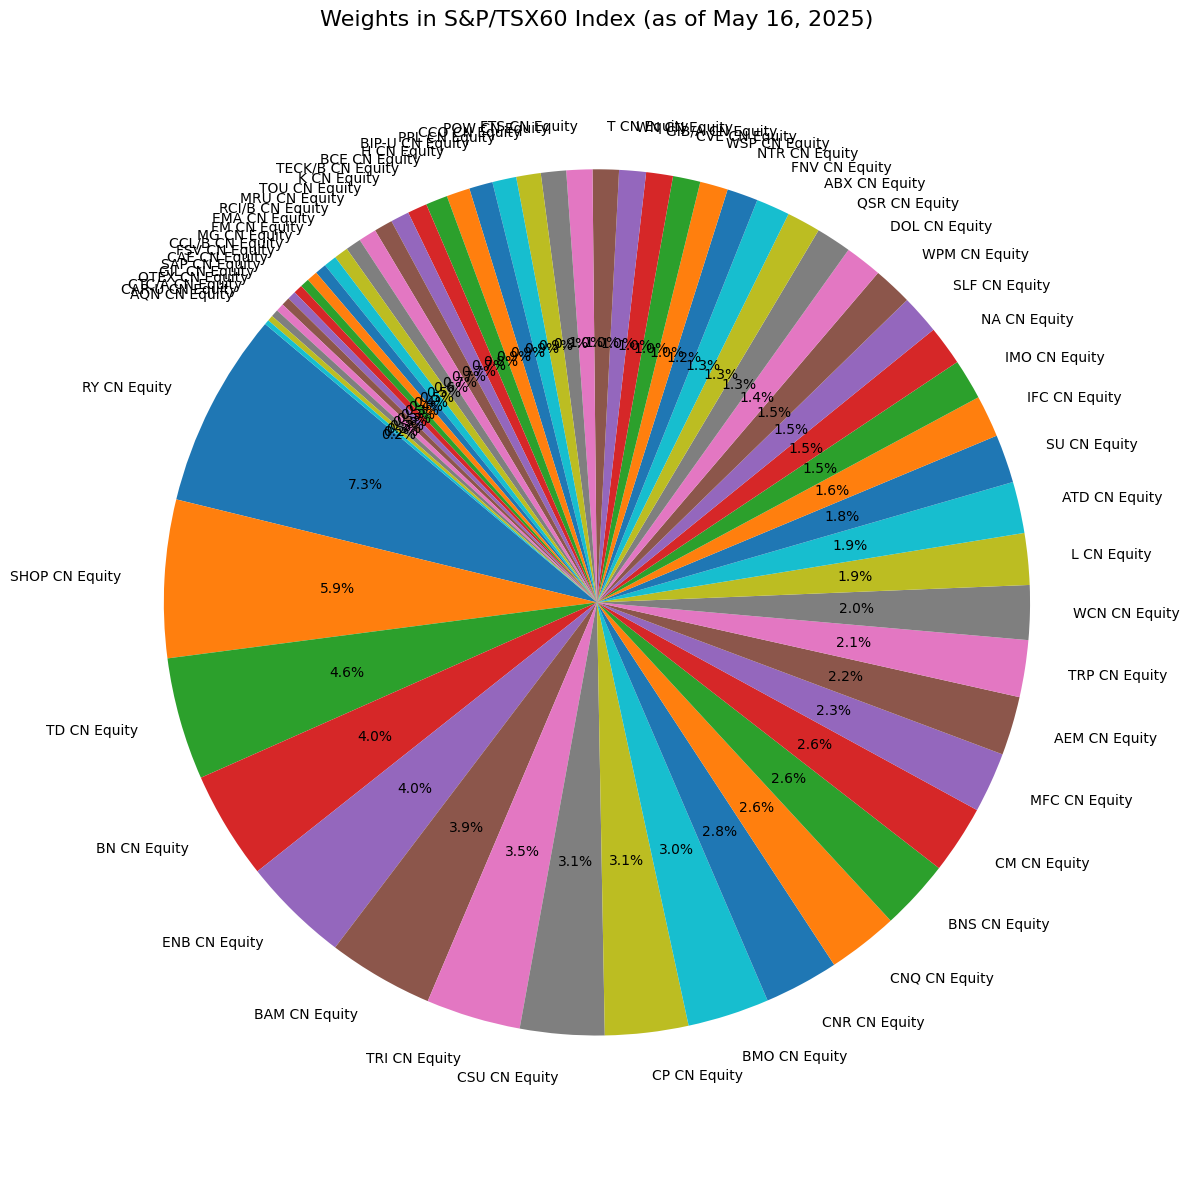

In [83]:
# Field for market cap: 'CUR_MKT_CAP'

# Bloomberg API only works with a terminal connected
market_cap_data = blp.bdh(
    tsx60_df["Company"].tolist(),
    start_date='2025-05-16',
    end_date='2025-05-16',
    Per='D',
    flds='CUR_MKT_CAP',
)
print(market_cap_data)

# Drop multi-index and get last available market cap
market_caps = market_cap_data.droplevel(level=1, axis=1).iloc[0]
market_caps = market_caps.dropna()  # Drop any missing values

# Step 2: Calculate weights
total_market_cap = market_caps.sum()
weights = market_caps / total_market_cap

# Step 3: Plot pie chart
plt.figure(figsize=(12, 12))
weights_sorted = weights.sort_values(ascending=False)  # Top 15 by weight for readability

plt.pie(weights_sorted, labels=weights_sorted.index, autopct='%1.1f%%', startangle=140)
plt.title('Weights in S&P/TSX60 Index (as of May 16, 2025)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()

### This is for test, ignore this.

           AEM CN Equity AQN CN Equity ATD CN Equity BMO CN Equity  \
             CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   
2025-05-16    74890.9542      5996.108    65454.3665   104083.4462   

           BNS CN Equity ABX CN Equity BCE CN Equity BAM CN Equity  \
             CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   
2025-05-16    89642.1877     42883.284    27793.0118   134615.1103   

           BN CN Equity BIP-U CN Equity  ... SU CN Equity TRP CN Equity  \
            CUR_MKT_CAP     CUR_MKT_CAP  ...  CUR_MKT_CAP   CUR_MKT_CAP   
2025-05-16  137555.7027      29999.0959  ...    61653.246    72441.0969   

           TECK/B CN Equity T CN Equity TRI CN Equity TD CN Equity  \
                CUR_MKT_CAP CUR_MKT_CAP   CUR_MKT_CAP  CUR_MKT_CAP   
2025-05-16       24951.3071  33402.3625   120511.1461  155932.5372   

           TOU CN Equity WCN CN Equity WPM CN Equity WSP CN Equity  
             CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP   CUR_MKT_CAP  
202

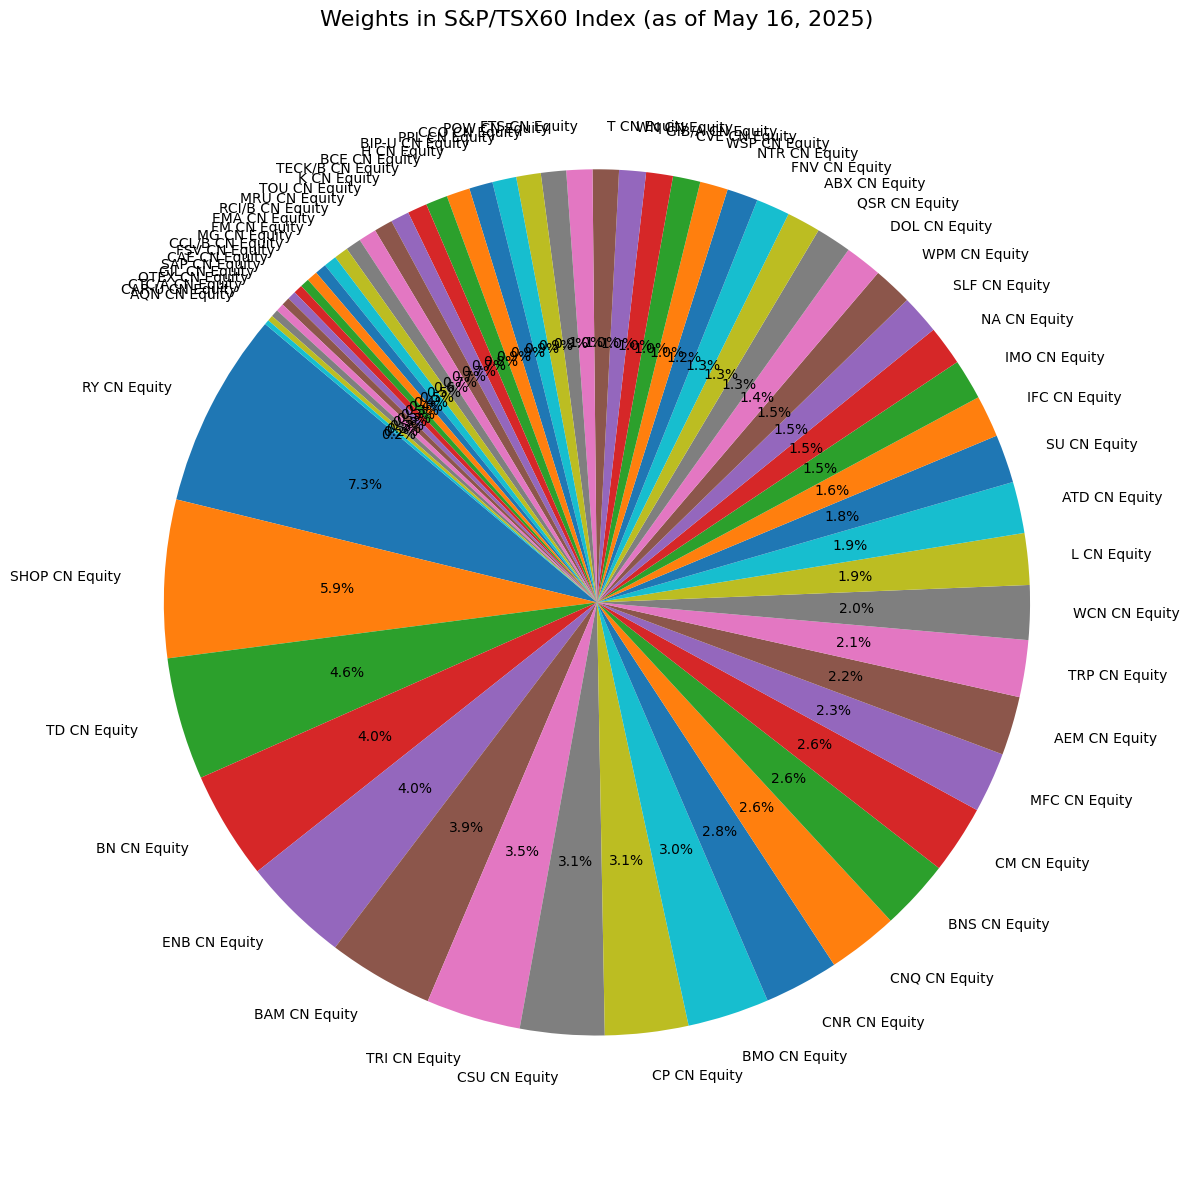

In [93]:
# List of tickers for the S&P/TSX 60 (Bloomberg format: 'TICKER CN Equity')
bloomberg_tickers = [
    'AEM CN Equity', 'AQN CN Equity', 'ATD CN Equity', 'BMO CN Equity', 'BNS CN Equity', 'ABX CN Equity',
    'BCE CN Equity', 'BAM CN Equity', 'BN CN Equity', 'BIP-U CN Equity', 'CAE CN Equity', 'CCO CN Equity',
    'CAR-U CN Equity', 'CM CN Equity', 'CNR CN Equity', 'CNQ CN Equity', 'CP CN Equity', 'CTC/A CN Equity',
    'CCL/B CN Equity', 'CVE CN Equity', 'GIB/A CN Equity', 'CSU CN Equity', 'DOL CN Equity', 'EMA CN Equity',
    'ENB CN Equity', 'FM CN Equity', 'FSV CN Equity', 'FTS CN Equity', 'FNV CN Equity', 'WN CN Equity',
    'GIL CN Equity', 'H CN Equity', 'IMO CN Equity', 'IFC CN Equity', 'K CN Equity', 'L CN Equity',
    'MG CN Equity', 'MFC CN Equity', 'MRU CN Equity', 'NA CN Equity', 'NTR CN Equity', 'OTEX CN Equity',
    'PPL CN Equity', 'POW CN Equity', 'QSR CN Equity', 'RCI/B CN Equity', 'RY CN Equity', 'SAP CN Equity',
    'SHOP CN Equity', 'SLF CN Equity', 'SU CN Equity', 'TRP CN Equity', 'TECK/B CN Equity', 'T CN Equity',
    'TRI CN Equity', 'TD CN Equity', 'TOU CN Equity', 'WCN CN Equity', 'WPM CN Equity', 'WSP CN Equity'
]

# Step 1: Download market caps for May 16, 2025
# Field for market cap: 'CUR_MKT_CAP'

# Bloomberg API only works with a terminal connected
market_cap_data = blp.bdh(
    tickers=bloomberg_tickers,
    flds='CUR_MKT_CAP',
    start_date='2025-05-16',
    end_date='2025-05-16'
)
print(market_cap_data)

# Drop multi-index and get last available market cap
market_caps = market_cap_data.droplevel(level=1, axis=1).iloc[0]
market_caps = market_caps.dropna()  # Drop any missing values

# Step 2: Calculate weights
total_market_cap = market_caps.sum()
weights = market_caps / total_market_cap

# Step 3: Plot pie chart
plt.figure(figsize=(12, 12))
weights_sorted = weights.sort_values(ascending=False)  # Top 15 by weight for readability

plt.pie(weights_sorted, labels=weights_sorted.index, autopct='%1.1f%%', startangle=140)
plt.title('Weights in S&P/TSX60 Index (as of May 16, 2025)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()


d)	Using the weights calculated in Part C, find and report the implied expected returns on each stock using the Black-Litterman approach.

                  Implied Return
SHOP CN Equity          0.109440
FM CN Equity            0.087239
BN CN Equity            0.079908
TECK/B CN Equity        0.072664
BAM CN Equity           0.068058
BIP-U CN Equity         0.065438
CCO CN Equity           0.057044
CVE CN Equity           0.056119
MG CN Equity            0.051641
CNQ CN Equity           0.051138


<Figure size 1200x600 with 0 Axes>

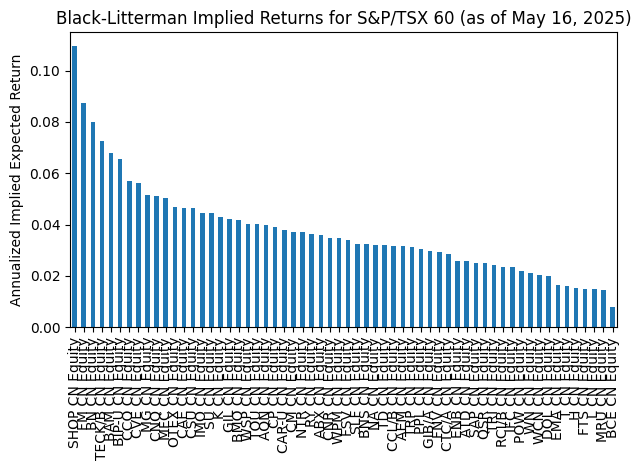

In [ ]:
# Step 1: Calculate daily log returns
returns = np.log(price_data / price_data.shift(1)).dropna()

# Step 2: Compute covariance matrix of returns
cov_matrix = returns.cov()

# Step 3: Set risk aversion coefficient (e.g., δ = 2.5)
delta = 2.5

# Step 4: Align weights with covariance matrix tickers
weights = weights[cov_matrix.columns]  # Ensure matching order

# Step 5: Compute implied returns using Black-Litterman formula
implied_returns = delta * cov_matrix @ weights

# Step 6: Convert to annualized expected returns (assuming 252 trading days)
annualized_implied_returns = implied_returns * 252

# Display results
implied_returns_df = annualized_implied_returns.sort_values(ascending=False).to_frame(name='Implied Return')
print(implied_returns_df.head(10))  # Show top 10

# Optional: Plot
plt.figure(figsize=(12, 6))
implied_returns_df.sort_values(by='Implied Return', ascending=False).plot(kind='bar', legend=False)
plt.ylabel('Annualized Implied Expected Return')
plt.title('Black-Litterman Implied Returns for S&P/TSX 60 (as of May 16, 2025)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


e)	Now, assume that you are a portfolio manager that has the following active views:

1.	Shopify will outperform Rogers by 5%.
2.	Return on Loblaw Companies Limited will be 1% higher than its average over the most recent 5-year period (the May 16, 2020 - May 16, 2025)

Calculate the Black-Litterman optimal portfolios:
1.	Using the first view only.
2.	Using the second view only.
3.	Using both views.



In [96]:
# Set Black-Litterman parameters
tau = 0.025
delta = 2.5

# Ensure alignment
tickers = implied_returns.index
Pi = implied_returns.values
Sigma = cov_matrix.loc[tickers, tickers].values
W_eq = weights.loc[tickers].values

# -----------------------
# View 1: SHOP > RCI/B by 5%
# -----------------------
P1 = np.zeros((1, len(tickers)))
P1[0, tickers.get_loc('SHOP CN Equity')] = 1
P1[0, tickers.get_loc('RCI/B CN Equity')] = -1
Q1 = np.array([0.05])

# -----------------------
# View 2: Loblaw +1% over historical avg
# -----------------------
loblaw_returns = returns['L CN Equity']
loblaw_mean_annual_return = loblaw_returns.mean() * 252
P2 = np.zeros((1, len(tickers)))
P2[0, tickers.get_loc('L CN Equity')] = 1
Q2 = np.array([loblaw_mean_annual_return + 0.01])

# Helper function: Compute Black-Litterman expected returns
def black_litterman_mu(P, Q):
    omega = np.diag(np.diag(P @ (tau * Sigma) @ P.T))  # View uncertainty
    tau_sigma_inv = np.linalg.inv(tau * Sigma)
    M_inverse = np.linalg.inv(tau_sigma_inv + P.T @ np.linalg.inv(omega) @ P)
    RHS = tau_sigma_inv @ Pi + P.T @ np.linalg.inv(omega) @ Q
    return M_inverse @ RHS

# Helper function: Compute optimal portfolio weights
def optimal_weights(mu_bl):
    return (1 / delta) * np.linalg.inv(Sigma) @ mu_bl

# --- Compute portfolios ---

# 1. View 1 only
mu_bl_1 = black_litterman_mu(P1, Q1)
w_bl_1 = optimal_weights(mu_bl_1)

# 2. View 2 only
mu_bl_2 = black_litterman_mu(P2, Q2)
w_bl_2 = optimal_weights(mu_bl_2)

# 3. Both views
P_both = np.vstack([P1, P2])
Q_both = np.hstack([Q1, Q2])
mu_bl_both = black_litterman_mu(P_both, Q_both)
w_bl_both = optimal_weights(mu_bl_both)

# Format output
weights_df = pd.DataFrame({
    'Market Cap Weight': W_eq,
    'BL Weight (View 1)': w_bl_1,
    'BL Weight (View 2)': w_bl_2,
    'BL Weight (Both)': w_bl_both
}, index=tickers)

# Normalize to sum to 1
weights_df = weights_df.div(weights_df.sum(axis=0), axis=1)

# Display top 10 differences for analysis
weights_df['Diff View 1'] = weights_df['BL Weight (View 1)'] - weights_df['Market Cap Weight']
weights_df['Diff View 2'] = weights_df['BL Weight (View 2)'] - weights_df['Market Cap Weight']
weights_df['Diff Both'] = weights_df['BL Weight (Both)'] - weights_df['Market Cap Weight']

weights_df[['Market Cap Weight', 'BL Weight (View 1)', 'BL Weight (View 2)', 'BL Weight (Both)']].sort_values(by='BL Weight (Both)', ascending=False).head(10)


,Market Cap Weight,BL Weight (View 1),BL Weight (View 2),BL Weight (Both)
L CN Equity,0.019237,0.019237,0.997687,0.997693
SHOP CN Equity,0.058877,7.590122,0.000139,0.027173
RY CN Equity,0.072879,0.072879,0.000172,0.000171
TD CN Equity,0.045681,0.045681,0.000108,0.000107
BN CN Equity,0.040298,0.040298,0.000095,0.000095
ENB CN Equity,0.040067,0.040067,0.000094,0.000094
BAM CN Equity,0.039436,0.039436,0.000093,0.000093
TRI CN Equity,0.035304,0.035304,0.000083,0.000083
CSU CN Equity,0.031456,0.031456,0.000074,0.000074
CP CN Equity,0.031074,0.031074,0.000073,0.000073


f)	Plot the differences in each portfolio weights from Part F and the weights from Part C. Discuss whether the weights differences are in line with your active views.

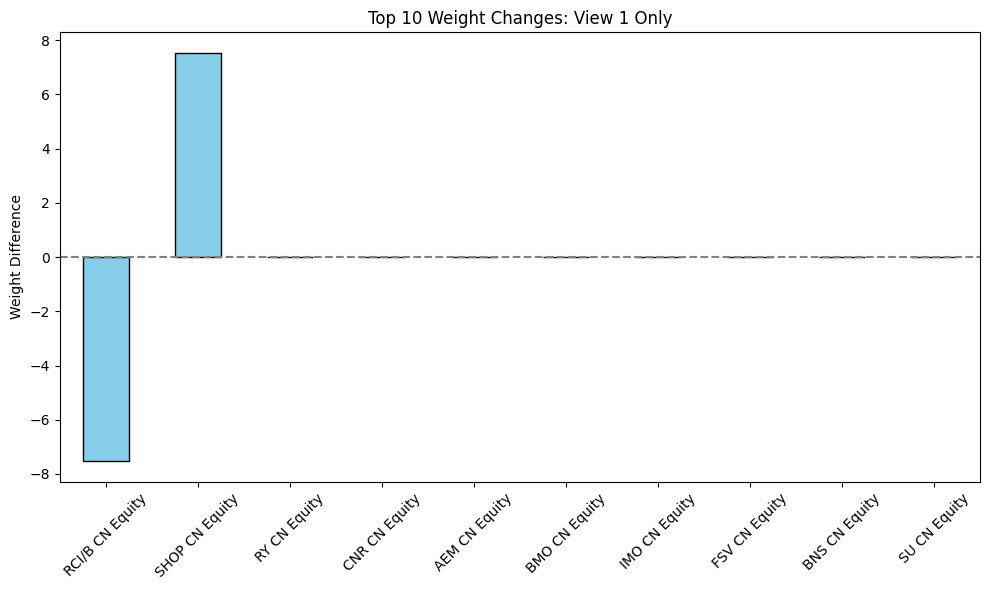

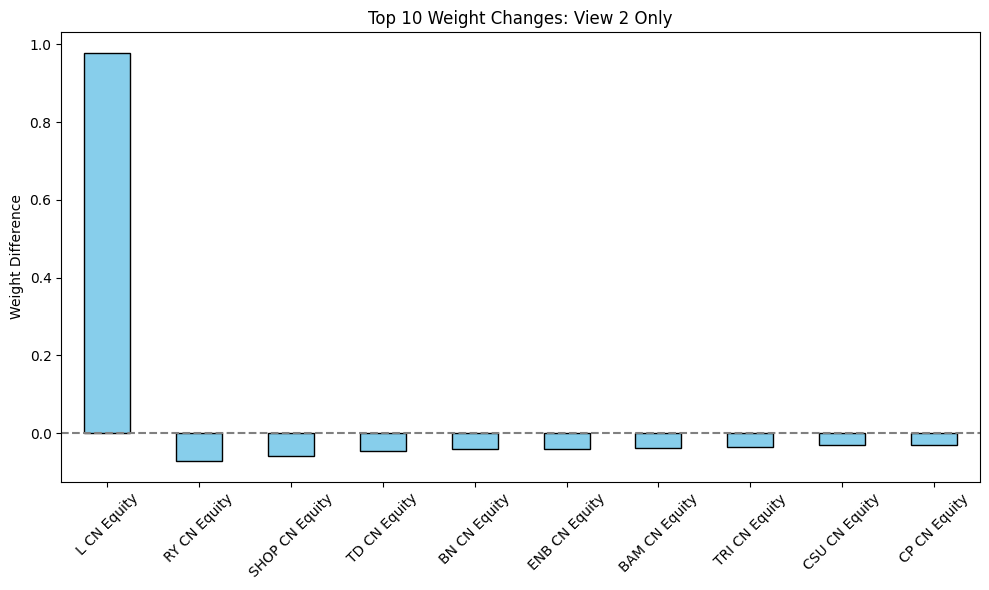

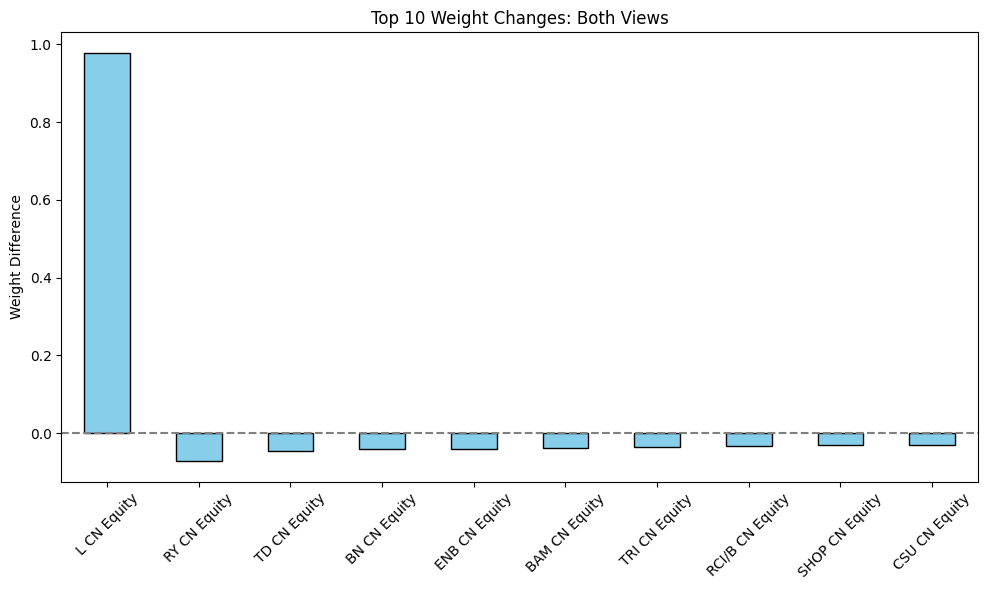

In [97]:
import matplotlib.pyplot as plt

# Set up for plotting top changes
top_n = 10  # Show top 10 weight changes

# Sort and plot top weight differences
for col, view_label in zip(['Diff View 1', 'Diff View 2', 'Diff Both'],
                           ['View 1 Only', 'View 2 Only', 'Both Views']):

    sorted_diff = weights_df[col].sort_values(key=abs, ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sorted_diff.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'Top {top_n} Weight Changes: {view_label}')
    plt.ylabel('Weight Difference')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
